In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import pandas as pd

In [3]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [4]:
death_df = pd.read_csv("time_series_covid19_deaths_global.csv")
death_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [5]:
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [6]:
Canada_confirmed = confirmed_df[confirmed_df['Country/Region'] == 'Canada']

In [7]:
Canada_confirmed.info

<bound method DataFrame.info of                Province/State Country/Region      Lat      Long  1/22/20  \
39                    Alberta         Canada  53.9333 -116.5765        0   
40           British Columbia         Canada  53.7267 -127.6476        0   
41           Diamond Princess         Canada   0.0000    0.0000        0   
42             Grand Princess         Canada   0.0000    0.0000        0   
43                   Manitoba         Canada  53.7609  -98.8139        0   
44              New Brunswick         Canada  46.5653  -66.4619        0   
45  Newfoundland and Labrador         Canada  53.1355  -57.6604        0   
46      Northwest Territories         Canada  64.8255 -124.8457        0   
47                Nova Scotia         Canada  44.6820  -63.7443        0   
48                    Ontario         Canada  51.2538  -85.3232        0   
49       Prince Edward Island         Canada  46.5107  -63.4168        0   
50                     Quebec         Canada  52.9399  -

In [8]:
# total confirm cases Canada (Adding Region data)
tmp = Canada_confirmed.iloc[:,4:]
data = tmp.sum()
data

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         1
            ...  
9/17/20    142879
9/18/20    144053
9/19/20    144607
9/20/20    145750
9/21/20    147583
Length: 244, dtype: int64

In [9]:
new_columns = ['canada_Cnf_Cases']
data= pd.DataFrame(data, columns = new_columns)
data

,canada_Cnf_Cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,1
...,...
9/17/20,142879
9/18/20,144053
9/19/20,144607
9/20/20,145750


<AxesSubplot:>

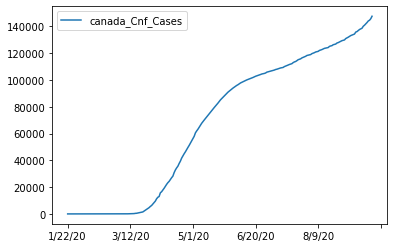

In [10]:
data.plot() 

In [12]:
#Check for Data stationary 
#If p< 0.05 ; Data is stationary
#if p>0.05; Data is not stationary

from statsmodels.tsa.stattools import adfuller
def ad_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
ad_test(data['canada_Cnf_Cases'])

1. ADF :  -0.4260840566956877
2. P-Value :  0.9056517363169387
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 233
5. Critical Values :
	 1% :  -3.458731141928624
	 5% :  -2.8740258764297293
	 10% :  -2.5734243167124093


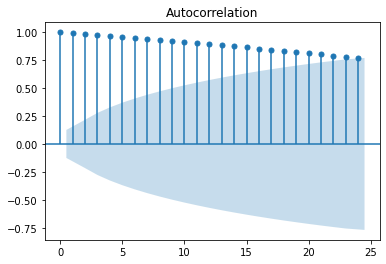

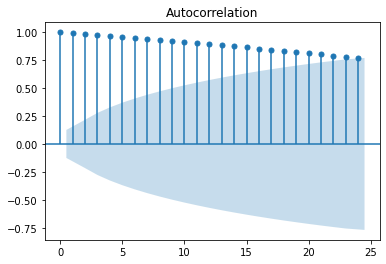

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

## Arima Model

In [44]:
# Test train data split 
print(data.shape)
train=data.iloc[:220] #220 data
test=data.iloc[220:] #24 data
predictions = []
print(test.shape)
print(train.shape)

(244, 1)
(24, 1)
(220, 1)


In [45]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq
    

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 5383.040057891099
(0, 0, 1) 5087.279850511565
(0, 1, 0) 3415.615767195611
(0, 1, 1) 3295.6685868081086
(0, 1, 2) 3244.1083852114916
(0, 1, 3) 3189.9938971754473
(0, 1, 4) 3163.324013585153
(0, 2, 0) 3141.5141866768736
(0, 2, 1) 3026.2490774457165
(0, 2, 2) 3013.149048729902
(0, 2, 3) 3008.8761653109495
(0, 2, 4) 3010.797344642021
(1, 0, 0) 3596.8218687136387
(1, 1, 0) 3141.328479675288
(1, 1, 1) 3042.2691012985097
(1, 1, 2) 3029.009081339361
(1, 1, 3) 3024.320184353017
(1, 1, 4) 3026.1412186571606
(1, 2, 0) 3066.627404314639
(1, 2, 1) 3019.2816197671596
(1, 2, 2) 3009.799246223494
(1, 2, 3) 3010.7903967962316
(1, 2, 4) 3012.260431124187
(2, 0, 0) 3177.3997375102567
(2, 0, 1) 3066.2257478422844
(2, 0, 2) 3053.5615548015203
(2, 0, 3) 3050.201672150725
(2, 0, 4) 3051.893521067802
(2, 1, 0) 3078.338326710583
(2, 1, 1) 3035.275411825144
(2, 1, 2) 3025.1003583777956
(2, 1, 3) 3026.117641834916
(2, 2, 0) 3024.824567257687
(2, 2, 1) 3013.9160062904393
(2, 2, 2) 3010.8058252334663
(2,

In [53]:
model_arima = ARIMA(train,order=(0,2,3)) # p d q (past,int,errors)
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

3008.8761653109495


In [54]:
predictions = model_arima_fit.forecast(steps=24)[0]
predictions

array([129815.67236449, 130295.49229582, 130785.81171819, 131278.35190981,
       131773.11287066, 132270.09460076, 132769.29710009, 133270.72036866,
       133774.36440647, 134280.22921351, 134788.3147898 , 135298.62113532,
       135811.14825008, 136325.89613408, 136842.86478732, 137362.0542098 ,
       137883.46440151, 138407.09536246, 138932.94709265, 139461.01959208,
       139991.31286075, 140523.82689866, 141058.5617058 , 141595.51728219])

In [55]:
test.shape

(24, 1)

In [56]:
predictions.shape

(24,)

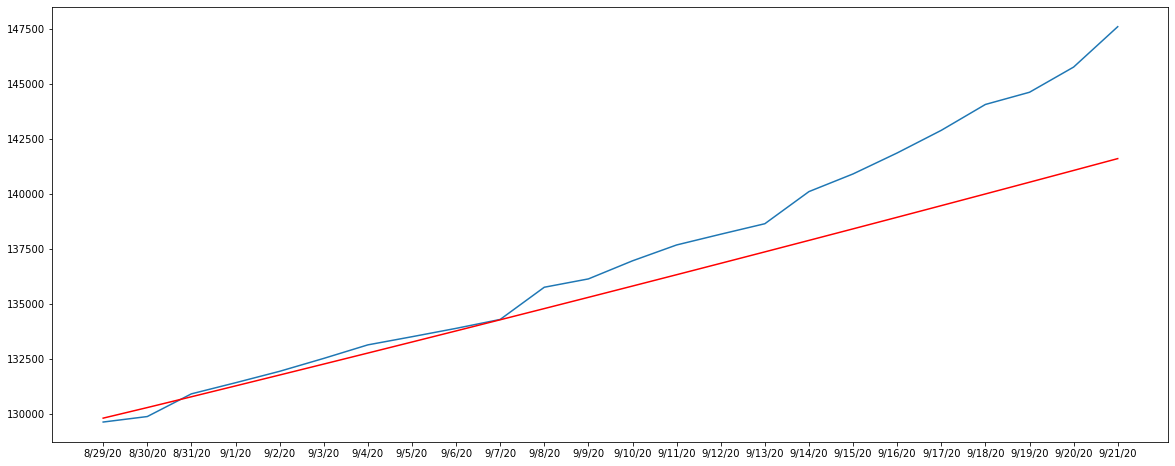

In [57]:
plt.figure(figsize = (20,8))
plt.plot(test)
plt.plot(predictions,color='red')

In [58]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test.canada_Cnf_Cases, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2336.666825


## AR Model 

In [32]:
df_diff = data.diff(periods=1)
df_diff.head()

,canada_Cnf_Cases
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,1.0


In [33]:
df_diff = df_diff[1:]
df_diff.head()

,canada_Cnf_Cases
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,1.0
1/27/20,0.0


<AxesSubplot:>

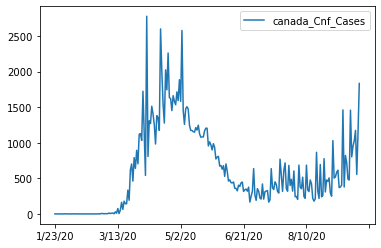

In [34]:
df_diff.plot()

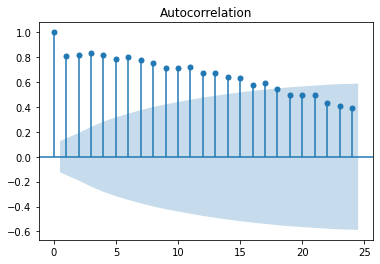

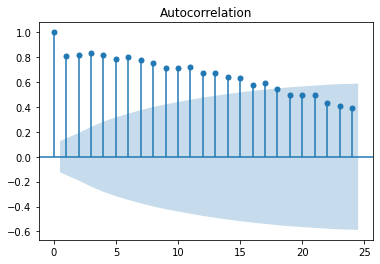

In [35]:
plot_acf(df_diff)

In [36]:
df_diff.shape

(243, 1)

In [37]:
train = df_diff[:220]
test = df_diff[220:]

In [38]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [39]:
predictions = model_ar_fit.predict(start=220,end=242)
predictions

2020-08-30    506.920896
2020-08-31    402.815799
2020-09-01    482.244135
2020-09-02    417.995452
2020-09-03    414.009328
2020-09-04    491.356984
2020-09-05    453.345132
2020-09-06    453.340711
2020-09-07    450.659213
2020-09-08    512.290598
2020-09-09    427.917780
2020-09-10    497.028882
2020-09-11    478.027315
2020-09-12    513.927553
2020-09-13    475.400923
2020-09-14    501.854732
2020-09-15    509.052812
2020-09-16    517.041770
2020-09-17    511.882183
2020-09-18    518.775053
2020-09-19    539.055328
2020-09-20    521.101853
2020-09-21    539.389331
Freq: D, dtype: float64

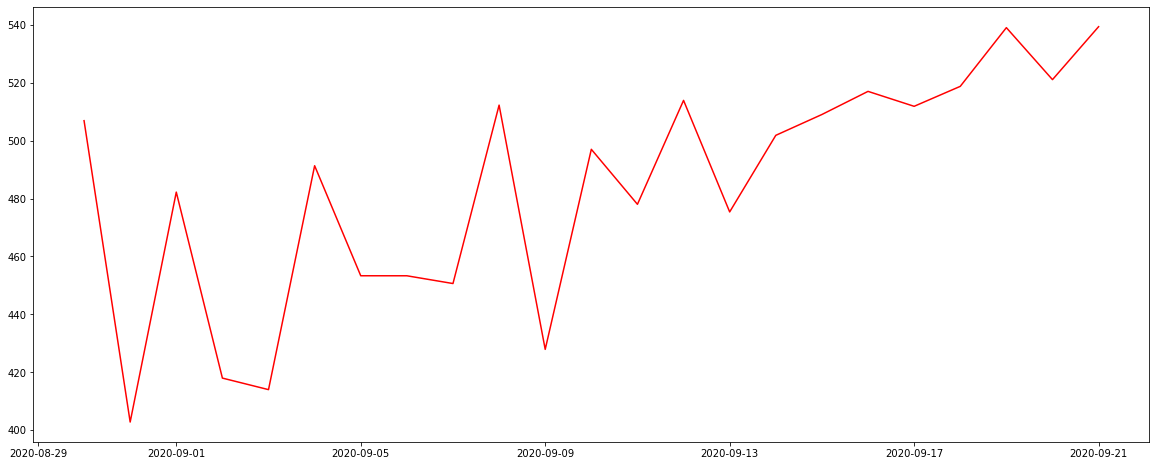

In [40]:
plt.figure(figsize = (20,8))
plt.plot(predictions,color='red')

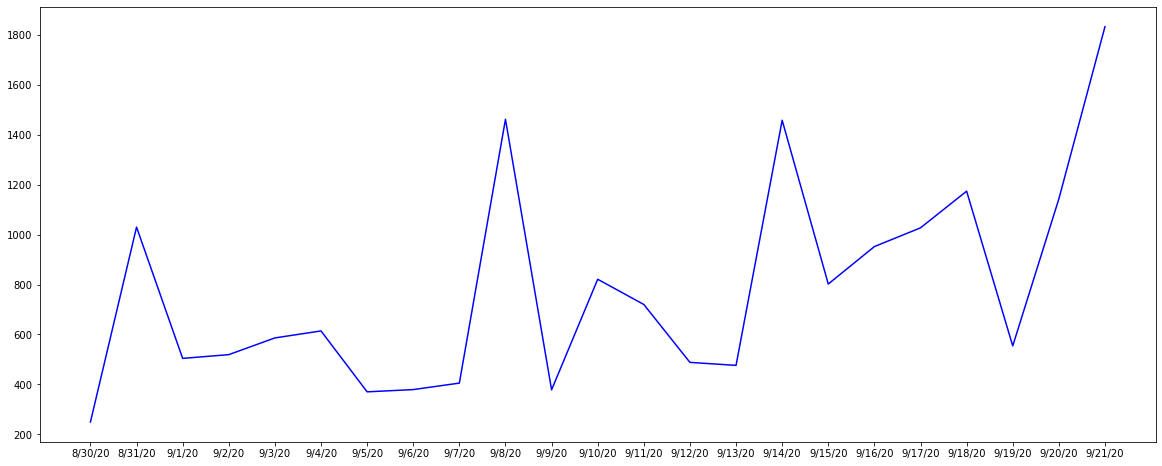

In [41]:
plt.figure(figsize = (20,8))
plt.plot(test,color='blue')

In [43]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 490.902207
